# Haberman's Survival Data

**Description**: The Haberman's Survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Haberman's Survival Dataset

Dataset: [Haberman's Survival Data Set](https://www.kaggle.com/gilsousa/habermans-survival-data-set)                             
Sources:(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

* The Data Set contains 306 instances of patients who had undergone surgery for breast cancer.
* Number of Attributes/Features: 4 (including the class attribute)

#### Attributes
1. Age (numerical)
2. Operation year (year - 1900, numerical)
3. Number of positive axillary nodes (numerical)
4. Survival status (class attribute)

#### Attribute Information
* **Survival status**: 

    1 = the patient survived 5 years or longer; 2 = the patient died within 5 year                                           
                                                                                                                             
                                                                                                                                                                                                                                                                        
* **Age**: 

    Represents the age at which patient underwent surgery (30-83).                                                      
                                                                                                                                         
                                                                                                                                         
* **Operation year**: 

    Represents the year in which the patient underwent surgery (1958-1969).                                      
                                                                                                                                   
                                                                                                                                   
* **Number of positive axillary lymph nodes**: 

    Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in lymph nodes under the arm suggests an increased risk of the cancer spreading. When lymph nodes are free, or clear, of cancer, the test results are negative. If lymph nodes have some cancer cells in them, they are called positive.
    
                                                                                                                             
    Haberman's survival dataset contains this information as positive axillary nodes (0-52).

                                                                                                                                 
                                                                                                                                                                  
                                                                                                                                 


![Node](raw/axil_nodes.jpeg)
                                                                                                                                 
                                                                                                                                 
(Source: [National Breast Cancer Foundation, Inc.](https://www.nationalbreastcancer.org/breast-cancer-lymph-node-removal))

#### Objective

To classify survival status of patients (in the span of 5 years) who underwent surgery for breast cancer based upon the patient's age, year of operation, and detection of positive axillary nodes.

## Exploratory Data Analysis of Haberman's Survival Dataset

___

### Sections
> 1. Import Libraries and Load Data                                                                  
> 2. Data Preparation and Data Description                                                               
> 3. Univariate Analysis
>> 3.1 Probability Density Function (PDF)                                                                        
>> 3.2 Cumulative Distribution Function (CDF)                                                                     
>> 3.3 Box Plot                                                                                                   
>> 3.4 Violin Plot                                                                                                
> 4. Bivariate Analysis
>> 4.1 Scatter Plot                                                                                               
>> 4.2 Pair Plot                                                                                                   
> 5. Conclusions
___

### 1. Import Libraries and Load Data

In [1]:
# import necesarry libraries

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load haberman.csv into a pandas DataFrame

df = pd.read_csv('data/haberman.csv', header = None)

### 2. Data Preparation and Data Description

In [3]:
df.head(10)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


Sample data at the top. First 10 data-points.

In [4]:
df.tail(10)

,0,1,2,3
296,72,67,3,1
297,73,62,0,1
298,73,68,0,1
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


Sample data at the bottom. Last 10 data-points.

In [5]:
df.shape

(306, 4)

Rows represent number of data-points and columns represent number of attributes/features. Dataset contains 306 data-points and 4 features.

In [6]:
df.columns = ['age', 'operation_year', 'axil_nodes', 'survival_status']

In [7]:
print('Column names in the dataset are: ')
df.columns

Column names in the dataset are: 


Index(['age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')

In [8]:
df.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


* There are no missing values.
* The values of target variable 'survival_status' are of integer datatype.

In [10]:
# unique values of target variable

print(list(df['survival_status'].unique()))

[1, 2]


* Value 1 represents survival of patient after 5 years of operation.
* Value 2 represents nonsurvival of patient after 5 years of operation. 

Mapping target values to 'yes' (patient survived after 5 years) and 'no' (patient died within 5 years) for meaningful classification.

In [11]:
# map values of target values to 'yes' and 'no'
df['survival_status'] = df['survival_status'].map({1: 'yes', 2: 'no'})

df.head(10)

,age,operation_year,axil_nodes,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes
5,33,58,10,yes
6,33,60,0,yes
7,34,59,0,no
8,34,66,9,no
9,34,58,30,yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [13]:
print(df.describe())

              age  operation_year  axil_nodes
count  306.000000      306.000000  306.000000
mean    52.457516       62.852941    4.026144
std     10.803452        3.249405    7.189654
min     30.000000       58.000000    0.000000
25%     44.000000       60.000000    0.000000
50%     52.000000       63.000000    1.000000
75%     60.750000       65.750000    4.000000
max     83.000000       69.000000   52.000000


In [14]:
print(df.iloc[:,-1].value_counts(0))

yes    225
no      81
Name: survival_status, dtype: int64


In [15]:
print('\nPercentage target variable distribution\n')
print(df.iloc[:,-1].value_counts(1)*100)


Percentage target variable distribution

yes    73.529412
no     26.470588
Name: survival_status, dtype: float64


#### Observations
* Target variable is imbalanced with 74% 'yes' and 26% 'no' for survival among 306 patients.
* Although the maximum number of positive lymph nodes observed is 52, the average positive lymph nodes observed is about 4.
* 25% of patients diagnosed with nill positive lymph nodes and 50% of patients diagnosed with a single lymph node.

### 3. Univariate Analysis

Univariate analysis is the simplest form of data analysis where the data being analyzed contains only one variable. Since it's a single variable, it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it.

#### 3.1 Probability Density Function (PDF)

Probability density function (PDF) is a statistical expression that defines a probability distribution for a continuous random variable as opposed to a discrete random variable. When the PDF is graphically portrayed, the area under the curve will indicate the interval in which the variable will fall. The total area in this interval of the graph equals the probability of a continuous random variable occurring.

Histograms are plotted to obtain the probability density of respective features.

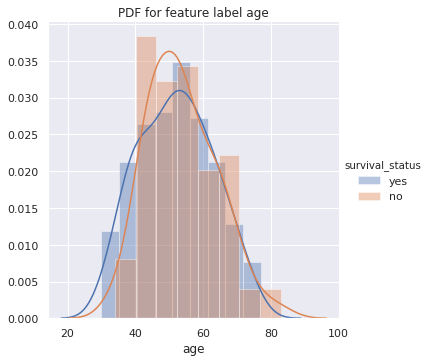

--------------------------------------------------


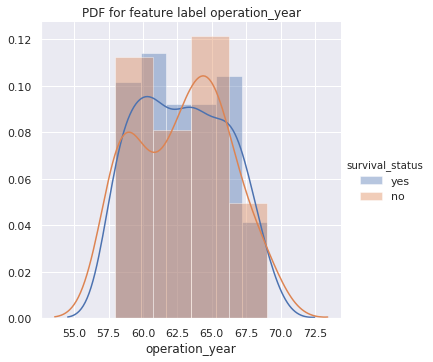

--------------------------------------------------


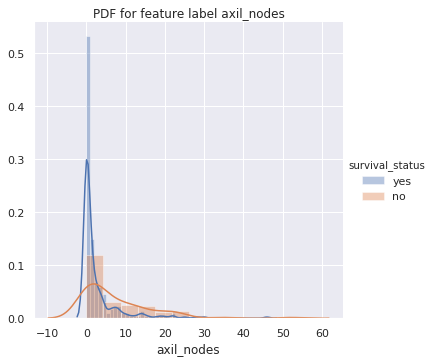

--------------------------------------------------


In [16]:
# the area under smoothened histogram is probability density

for i, label in enumerate(df.columns[:-1]):
    sns.FacetGrid(df, hue = 'survival_status', height = 5).map(sns.distplot, label).add_legend()
    plt.title('PDF for feature label ' + label)
    plt.show()
    print('-'*50)

Massive overlap in the distribution of target classes is observed for all the features considered individually.

Cumulative distribution function is helpful in obtaining more meaningful insights.

#### 3.2 Cumulative Distribution Function (CDF)

Cumulative Distribution Function (CDF) is the result of cumulative sum of distributions in PDF.

In [17]:
# variables of target classes

survived = df.loc[df['survival_status'] == 'yes']
not_survived = df.loc[df['survival_status'] == 'no']

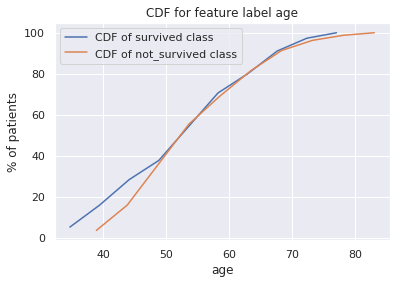

--------------------------------------------------


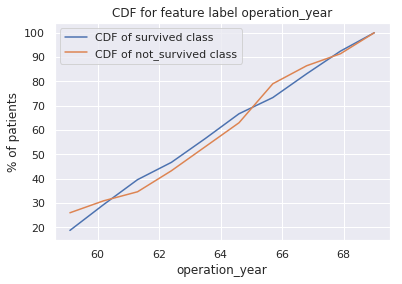

--------------------------------------------------


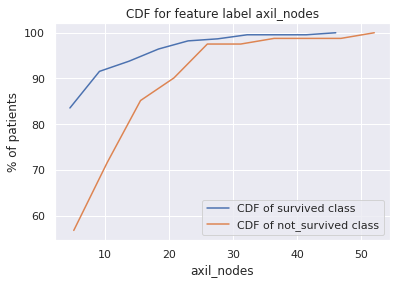

--------------------------------------------------


In [18]:
for i, label in enumerate(df.columns[:-1]):
    
    # CDF for survived class
    counts, bin_edges = np.histogram(survived[label], bins=10, density = True)

    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf) * 100
    plt.plot(bin_edges[1:], cdf)

    # CDF for not_survived class
    counts, bin_edges = np.histogram(not_survived[label], bins=10, density = True)

    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf) * 100
    plt.plot(bin_edges[1:], cdf)


    plt.xlabel(label)
    plt.ylabel('% of patients')
    plt.legend(('CDF of survived class','CDF of not_survived class'))
    plt.title('CDF for feature label ' + label)
    plt.show()
    print('-'*50)

#### Observations

* 60% of non-surviving patients were above the age of 50.
* Survival rate is slightly higher for the patients that underwent surgery after 1961.
* About 82% of surviving patients had 5 or fewer positive axillary lympy nodes.

#### 3.3 Box Plot

The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.
                                                   
Quartile 1                 --> 25th percentile                                                                                                                                                          
Quartile 2                 --> 50th percentile or median                                                                                                                                           
Quartile 3                 --> 75th percentile                                                                      
Inter Quartile Range (IQR) = Quartile 3 - Quartile 1                                                                                                                                     
Upper whisker              --> Quartile 1 - 1.5 * IQR                                                                                                                                                 
Lower whisker              --> Quartile 3 + 1.5 * IQR                                                                 

Points outside the box are the outliers in data.

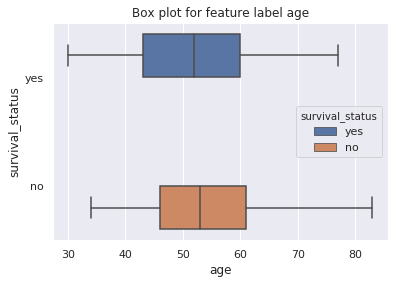

--------------------------------------------------


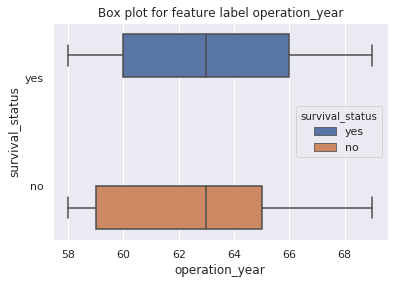

--------------------------------------------------


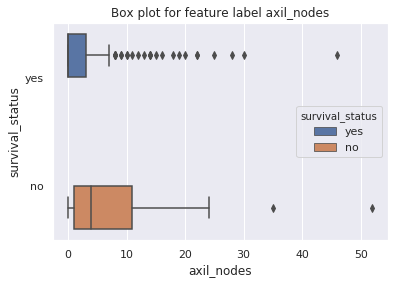

--------------------------------------------------


In [19]:
for i, label in enumerate(df.columns[:-1]):
    sns.boxplot(x = label,y = 'survival_status', hue = 'survival_status', data = df)
    plt.title('Box plot for feature label ' + label)
    plt.show()
    print('-'*50)

#### 3.4 Violin Plot 

Violin plot shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.This can be an effective and attractive way to show multiple distributions of data at once.


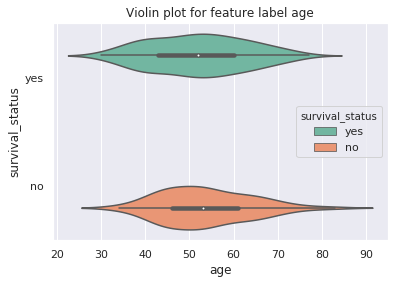

--------------------------------------------------


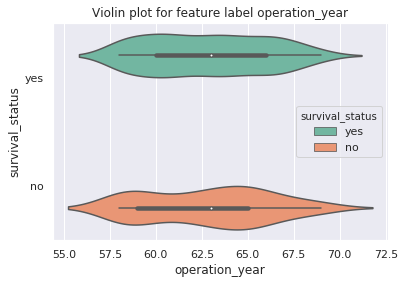

--------------------------------------------------


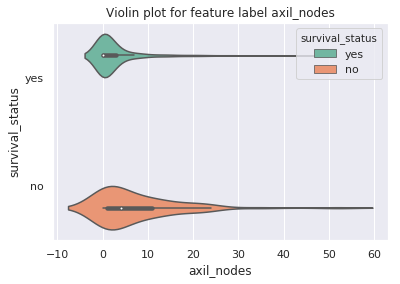

--------------------------------------------------


In [20]:
for i, label in enumerate(df.columns[:-1]):
    sns.violinplot(x = label, y = 'survival_status', hue = 'survival_status', data = df, palette = "Set2")
    plt.title('Violin plot for feature label ' + label)
    plt.show()
    print('-'*50)

#### Observations

* The median age observed in surviving patients is around 52 and 75th percentile is around 60.
* The median positive axillary lymph nodes observed in surviving patients is 0 and 75th percentile is less than 5.
* The median positive axillary lymph nodes observed in non-surviving patients is around 4 and 75th percentile is around 11.

### 4. Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

#### 4.1 Scatter Plot

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis.

Scatter plots are sometimes called correlation plots because they show how two variables are correlated.

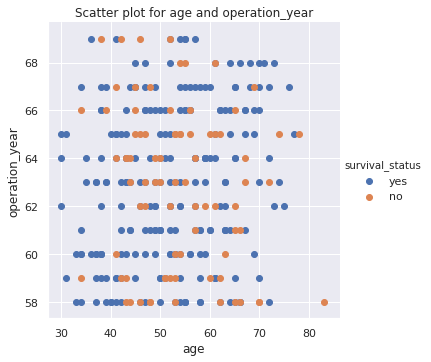

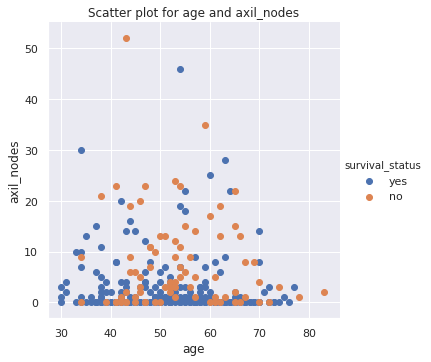

In [21]:
# 2-D Scatter plot with color-coding for each class of target variable.


for i, label in enumerate(df.columns[1:-1]):
    sns.FacetGrid(df, hue = 'survival_status', height = 5).map(plt.scatter, 'age', label).add_legend()
    plt.title('Scatter plot for age and ' + label)
    plt.show()

#### 4.2 Pair Plot

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

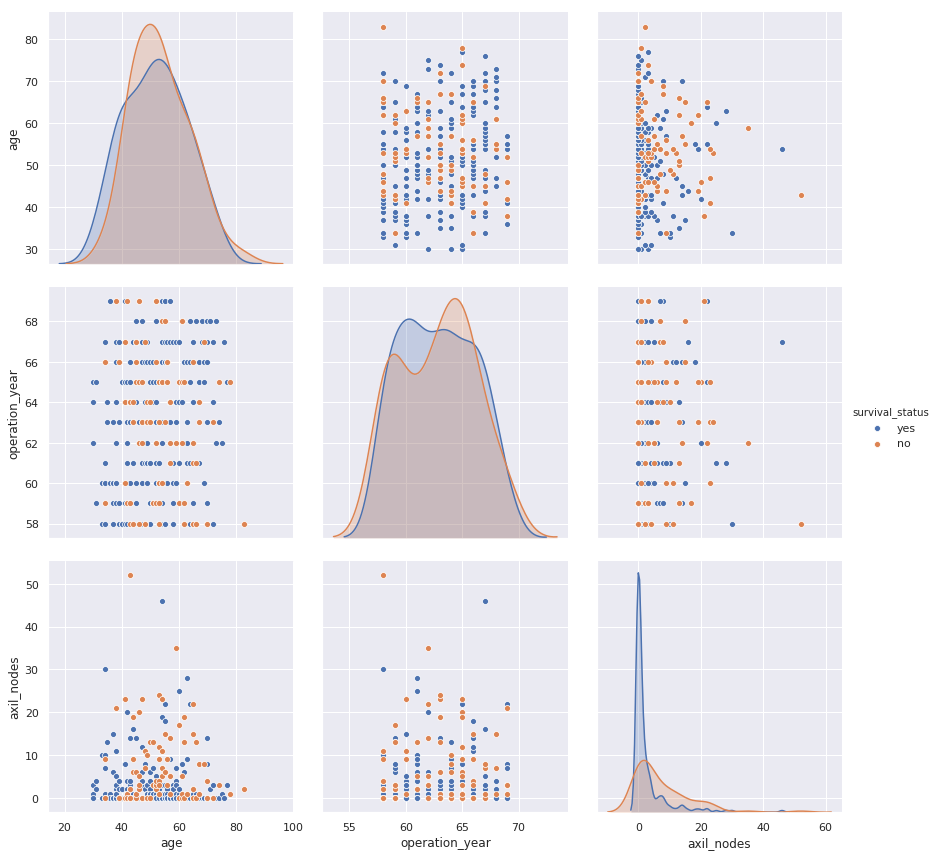

In [22]:
sns.pairplot(df, hue = 'survival_status', height = 4)
plt.show()

#### Observations
* Target classes massively overlap in the presence of feature label age. 
* In comparison, the scatter plot of axillary lymph nodes vs. operation year seems to separate target classes better.

### 5. Conclusions

1. Dataset is significantly small with only 306 instances. Deriving intuitions from fewer data-points to classify survival or non-survival is inefficient.
2. Dataset is imbalanced with 74% of instances belonging to one of the two target classes.
3. Target classes massively overlap and are not linearly separable. Simple linear separation models are not useful in the classification of survival status. 
4. The feature 'axil_nodes' is the most informative among other features. 
5. It has been observed that patients with fewer positive axillary nodes have higher chances of survival and vice versa.

#### References:
[1] https://www.nationalbreastcancer.org/                                                                                 
[2] https://www.breastcancer.org/symptoms/diagnosis/lymph_nodes                                                          
[3] https://www.kaggle.com/gilsousa/habermans-survival-data-set                                                           
[4] https://www.kaggle.com/vj1998/haberman-s-survival-exploratory-data-analysis                                             
[5] https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis                                      
[6] https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673                           
[7] https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-most-simple-manner-possible                                                                                                                   
[8] http://www.physics.csbsju.edu/stats/box2.html                                                                         
[9] https://seaborn.pydata.org/generated/seaborn.violinplot.html                                                       
[10] https://www.saedsayad.com/bivariate_analysis.htm                                                                                          
[11] https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot/                                                     
[12] https://www.quora.com/What-are-pair-plots                                                                              
[13] https://stackoverflow.com/questions/35465557/how-to-apply-color-in-markdown                                             